# <div align='center'>第8章 非参数统计(1)</div>
### 内容
 <div align='left'>                  
     <font color='steelblue' size=4>
       8.1 经验分布和分布探索<br>
       8.2 单样本非参数统计推断<br>
       8.3 两独立样本的位置与尺度判断<br>
       8.4 多组数据位置推断<br>
       8.5 分类数据的关联分析<br>
       8.6 秩相关与分位数回归<br>
       8.7 非参数密度估计<br>
       8.8 一元非参数回归<br>
         </font>
       </div>

**基础概念**：

参数估计和非参数估计是统计学中两种主要的估计方法，用于从样本数据去了解总体的分布和性质。它们有一些显著的区别。

- 参数估计：

参数估计是一种假设总体分布遵循某种已知的参数形式（例如正态分布），并从样本数据中估计出这些参数的值的方法。例如，我们可能会从样本数据中估计总体的平均值和标准差，然后假设总体遵循与这些参数相对应的正态分布。

- 非参数估计：

相对应地，非参数估计不会做出总体分布遵循任何特定形式的假设。非参数方法关注的是对数据结构的解释，而不是尝试找出总体的特定参数。它们通常比参数方法更灵活，但可能需要更多的数据才能得到准确的估计。
在医学数据的环境中，比如考虑一项研究，研究者们想要确定糖尿病和心脏病之间的关系。

    采用参数估计的方法，研究人员可能会做出假设，如两个变量（糖尿病和心脏病的发生）遵循二项分布或者正态分布，并使用逻辑斯蒂回归或者其他模型，通过估计模型参数来了解变量间的关系。
    对于非参数估计，研究者则无需对数据分布进行假设，他们可能会使用诸如卡方检验或者曼-惠特尼U检验等方法，根据样本数据的实际观测值来推断这两种疾病之间的关系。

因此，具体使用哪种方法主要取决于研究者的目标和假设，以及数据的特性，包括其分布形式，数据量大小等等。

非参数统计是一种统计方法，它对数据的分布形式没有假设，或者假设很少。它的关键特点包括：

    1. 它们不依赖于参数假设，即它们不假定数据遵循任何特定的分布，如正态分布。假定少，效率高，结果稳定性比较好，不会因为假设错误而导致结论性错误~
    2. 灵活性较大，适用于复杂或未知的分布。
    3. 它们通常对离群值和偏态数据更具有鲁棒性。
    4. 常常需要更大量的样本数据才能达到与参数方法同等的统计效力。

再说下医学的例子，假设我们在研究一个新的癌症治疗方法。我们有两组病人，一组接受新的治疗方法，另一组接受传统的治疗方法。我们的目标是比较两组病人的生存期。
在这种情况下，生存期的分布可能很复杂，不易归入任何已知的概率分布。此时，我们就可以使用非参数方法进行比较。常用的非参数方法包括曼-惠特尼U检验（Mann-Whitney U test）或科克斯比例风险模型（Cox proportional hazards model），这两种方法都可以在不假设数据分布的情况下比较两组生存期的差异。

----------------

## 8.1经验分布和分布探索

### 8.1.1 经验分布

#### 例1：
1966年，Cox和Lewis两位科学家的研究报告给出了神经纤维细胞799次激活的等待时间的分布拟合，其数据分布函数。(数据见nerve.txt文件)


`%reset -f` 命令已成功执行。这个命令是 Jupyter Notebook 的内置命令，%reset 会重置变量命名空间，移除所有已定义的变量。-f 选项即 --force ，强制执行不需要确认。这意味着你的 Python 环境中的所有变量现在都已被清除。如果你需要再使用某些变量，你需要重新定义它们。

经验分布函数（Empirical Distribution Function，EDF），又称经验函数，是对数据的实际分布的度量。当我们有一个样本集合，我们可以用经验函数去拟合每个观察值的分布。

经验分布函数是定义在样本空间上的概率分布，其值由样本自身的分布决定。具体地说，对于一组样本数据 {x1, x2, ..., xn}，以及任意数字 x，经验分布函数 F(x) 表示的是小于或等于 x 的样本值的比例。数学表示如下：
F(x) = （小于或等于 x 的样本值的总数） / n

其中 n 是样本数据的数量。
举个例子，假设我们有这样一组年龄数据：{20, 21, 21, 23, 24, 25, 25, 25, 26, 30}，我们可以计算出对于年龄24，经验分布函数值F(24)为0.5，因为有一半的年龄数据小于或等于24。同样，对于年龄30，因为所有年龄都小于或等于30，所以F(30) = 1。
经验分布函数为我们提供了一个对样本数据实际分布的直观理解，非常有用于数据分析和统计建模。

In [12]:
'''
  经验分布函数
'''
%reset -f
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats.anova as sma

import statsmodels.formula.api as smf
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

nerve_data = pd.read_table('./data/nerve.txt',header=None)
print(nerve_data.shape)
nerve_data.head()

(160, 1)


,0
0,0.21 0.03 0.05 0.11 0.59
1,0.06 0.18 0.55 0.37 0.09
2,0.14 0.19 0.02 0.14 0.09
3,0.05 0.15 0.23 0.15 0.08
4,0.24 0.16 0.06 0.11 0.15


In [15]:
nerve_data = np.array(nerve_data).ravel()
nerve_data[1:10]

array(['0.06 0.18 0.55 0.37 0.09', '0.14 0.19 0.02 0.14 0.09',
       '0.05 0.15 0.23 0.15 0.08', '0.24 0.16 0.06 0.11 0.15',
       '0.09 0.03 0.21 0.02 0.14', '0.24 0.29 0.16 0.07 0.07',
       '0.04 0.02 0.15 0.12 0.26', '0.15 0.33 0.06 0.51 0.11',
       '0.28 0.36 0.14 0.55 0.28'], dtype=object)

In [16]:
n_data = []

for line in nerve_data:
    for d in line.split():
        n_data.append(float(d))
        
n_data[0:10]

[0.21, 0.03, 0.05, 0.11, 0.59, 0.06, 0.18, 0.55, 0.37, 0.09]

计算经验分布函数的置信区间的方法有很多种，其中一种常见的方法是使用 Dvoretzky–Kiefer–Wolfowitz (DKW) 不等式。这个不等式可以用来为任何 n 个样本（即观察值的数量）的经验分布函数生成一个两侧的（即上下限都有）置信区间。

假设我们的数据是一个随机样本，且每个观察都是从相同的分布中独立抽取的。对于任何从该分布中抽取的另一个样本，我们希望生成的经验分布函数也位于原始样本的经验分布函数的置信区间内。通常会选择 95% 的置信水平，那么有 95% 的可能性，任何新抽取的样本（假定其来自与原始样本相同的分布）的经验分布函数都会在原始样本经验分布函数的 95% 置信区间内。这为我们提供了一个估计样本统计量真实值的可靠范围。假设 $F_n$ 是观察到的经验分布函数，$F$ 是总体分布函数，对于所有的 $F$ 和 $n$，以及对于所有的 $x$，有 $Pr(sup|F_n(x)-F(x)| > \epsilon) \leq 2exp(-2n\epsilon^2)$


另一个计算经验分布函数置信区间的方法是使用自助法（bootstrap）。这是一种通过重新抽样原始数据来估计样本统计量不确定性的统计技术。对于给定的数据集，我们可以反复抽取样本（允许重复），并创建一个新的数据集，这就是自助样本。然后，我们可以用自助样本来生成经验分布函数，并重复这个过程很多次。最后，我们可以用所有生成的经验分布函数来估计置信区间。

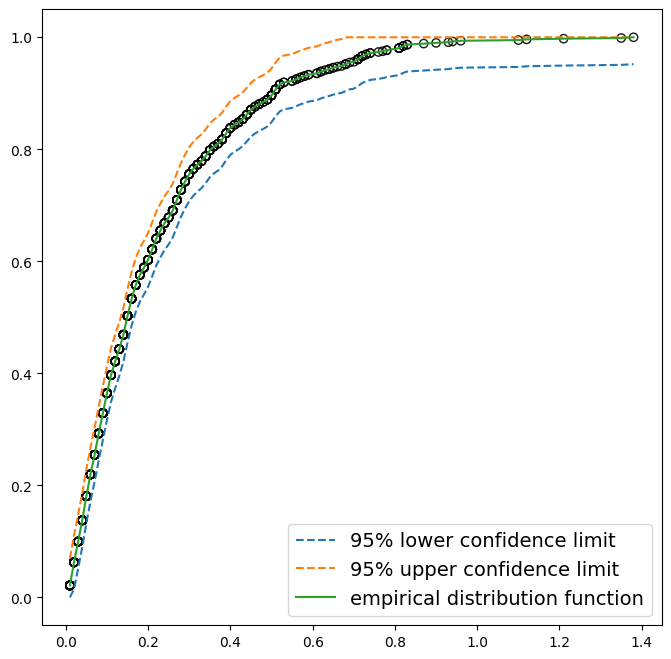

In [18]:
###数据排序
nerve = sorted(n_data)
###获取数据的秩
n_rank = st.rankdata(nerve)
###数据的长度
n= len(n_data)
###数据的经验分布函数：秩/数据长度
n_cdf = n_rank/n

###经验分布的置信区间：见上图中的公式(1)和(3)
band = np.sqrt((1/(2*n))*np.log(2/0.05))#置信区间的宽度
lower95 = n_cdf - band#下限
upper95 = n_cdf + band#上限
###下限小于0，则将之设为0；上限大于1，则将之设为1
lower95[np.where(lower95<0)]=0
upper95[np.where(upper95>1)]=1

plt.figure(figsize=(8, 8))
WRYH = mpl.font_manager.FontProperties(fname = './figures/yahei.ttf') #微软雅黑字体
# plt.title('可视化图鉴',fontproperties = WRYH)
plt.plot(nerve,lower95,'--',label='95% lower confidence limit')
plt.plot(nerve,upper95,'--',label='95% upper confidence limit')
plt.plot(nerve,n_cdf,label='empirical distribution function')
plt.scatter(nerve,n_cdf,facecolor = 'None', edgecolor = 'k', alpha = 0.9)
plt.legend(fontsize=14)
plt.show()

### 8.1.2 生存函数


生存函数，也被称为可靠性函数，是一个关键的概念在生存分析中，这是一个关注时间到事件发生（例如，死亡，疾病复发，机器故障等）的统计方法。

生存函数 S(t) 给出了一个对象或者个体在时间 t 仍然存活（或者更一般地，事件还未发生）的概率。数学上，它可以表示为：
$$S(t) = P(T > t)$$

在这里，T 是一个随机变量，代表时间到事件发生，t 是一个具体的时间点。

例如，在医学研究中，如果一个病人在接受治疗后确实存活了 5 年，那么 S(5) 就给出了所有类似病人中存活 5 年或者更长时间的比例。这对于评估治疗方法的效果，预测未来情况等都非常有用。

值得注意的是，生存函数和概率密度函数（PDF）以及累积分布函数（CDF）是密切相关的。生存函数实际上就是累积分布函数的补函数。也就是说，生存函数的值 S(t) 是事件在时间 t 后发生的概率，而 CDF 的值 F(t) 是事件在时间 t 或者更早时间发生的概率，两者之和总是等于 1：

$$S(t) = 1 - F(t)$$

当我们知道了生存时间的概率分布后，我们就可以用上述公式来计算生存函数。同样，如果我们知道了生存函数，我们就可以求出累积分布函数。

#### 例2：
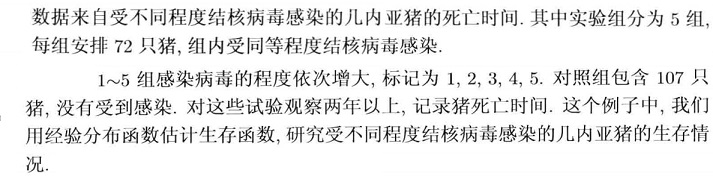

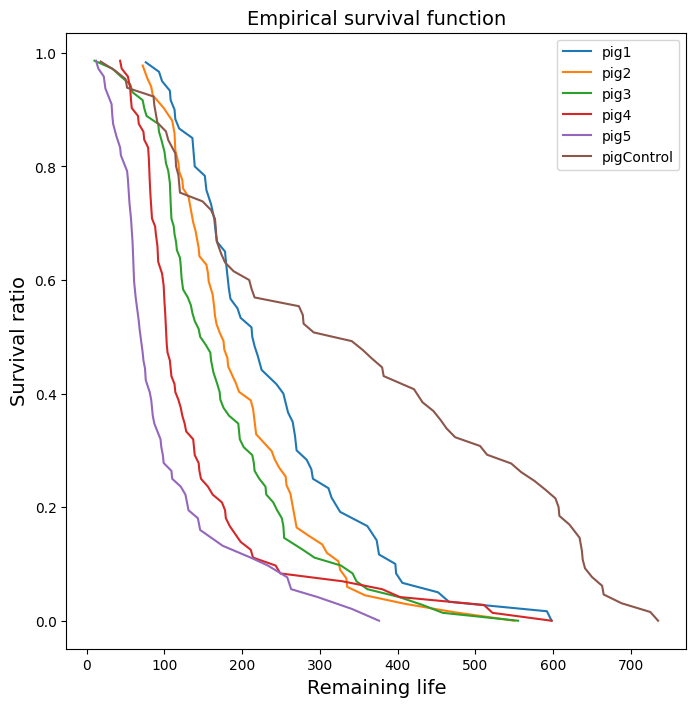

In [22]:
'''
  生存函数
'''
def sf(data):
    sorted_data = sorted(data)
    n_rank = st.rankdata(sorted_data)
    n = len(sorted_data)
    ##生存函数(有时称为“残存函数”)
    sf = 1 - n_rank/n ##sf=1-cdf
    return sf
    
pig1 = np.sort(pd.read_table('data/pig_data/gpigs1.txt',header=None).T).ravel()
pig2 = np.sort(pd.read_table('data/pig_data/gpigs2.txt',header=None).T).ravel()
pig3 = np.sort(pd.read_table('data/pig_data/gpigs3.txt',header=None).T).ravel()
pig4 = np.sort(pd.read_table('data/pig_data/gpigs4.txt',header=None).T).ravel()
pig5 = np.sort(pd.read_table('data/pig_data/gpigs5.txt',header=None).T).ravel()
pigControl = np.sort(pd.read_table('data/pig_data/gpigscontrol.txt',header=None).T).ravel()
plt.figure(figsize=(8,8))
plt.plot(pig1,sf(pig1),label='pig1')
plt.plot(pig2,sf(pig2),label='pig2')
plt.plot(pig3,sf(pig3),label='pig3')
plt.plot(pig4,sf(pig4),label='pig4')
plt.plot(pig5,sf(pig5),label='pig5')
plt.plot(pigControl,sf(pigControl),label='pigControl')
plt.xlabel('Remaining life',size=14)
plt.ylabel('Survival ratio',size=14)
plt.title('Empirical survival function',size=14)
plt.legend()
plt.show()

可以看出生存函数是分布函数的补集！

在生存分析中，对于资料中的每个风险事件，都对应有一个风险比例。我们可以将每个风险比例想象为一个独立的观察事件，它的“风险比函数方差”或者说“风险比例的方差”（Variance of the risk ratio）就是度量这个风险比例的离散程度的指标。

在你的python代码中，风险比函数方差vf是通过公式vf = cdf/(n*(1-cdf))来计算的，其中 cdf 是经验累积分布函数值，n 是样本的数量。这个公式实际上是从生存分析的角度推导出的Cox模型的方差公式，目的是估计每个观察到的风险比例值的变异性。

很明显，这个风险比函数方差的计算公式体现了以下特点:

    对于相同的样本量 n，风险事件比例越高 (cdf 越大)，其方差越大，反之亦然。这反映了风险比例高的情况下，存在更大的不确定性。
    对于相同的风险比例，样本量越大，方差越小。这说明数据量大的情况下，我们对风险比例的估计会相对精确，不确定性更小。
    
风险比函数方差（Variance of the risk ratio）的计算通常基于某种特定模型（例如，Cox模型用于生存分析）的结果。具体的计算公式可能会因模型和使用的统计方法的不同而有所不同。在你之前提供的Python代码中，使用了一种特定的量化风险比函数方差的方法：
我们其实很容易将其和二项式分布联系在一起~

$$vf = cdf/(n*(1-cdf))$$


In [28]:
###风险比函数方差
def vcdf(data):
    sorted_data = sorted(data)
    n_rank = st.rankdata(sorted_data)
    n = len(sorted_data)
    cdf =  n_rank/n
    vf = cdf/(n*(1-cdf))
    return vf

/tmp/ipykernel_3743739/965190009.py:7: RuntimeWarning: divide by zero encountered in divide
  vf = cdf/(n*(1-cdf))
/tmp/ipykernel_3743739/965190009.py:7: RuntimeWarning: divide by zero encountered in divide
  vf = cdf/(n*(1-cdf))
/tmp/ipykernel_3743739/965190009.py:7: RuntimeWarning: divide by zero encountered in divide
  vf = cdf/(n*(1-cdf))
/tmp/ipykernel_3743739/965190009.py:7: RuntimeWarning: divide by zero encountered in divide
  vf = cdf/(n*(1-cdf))
/tmp/ipykernel_3743739/965190009.py:7: RuntimeWarning: divide by zero encountered in divide
  vf = cdf/(n*(1-cdf))
/tmp/ipykernel_3743739/965190009.py:7: RuntimeWarning: divide by zero encountered in divide
  vf = cdf/(n*(1-cdf))
No handles with labels found to put in legend.


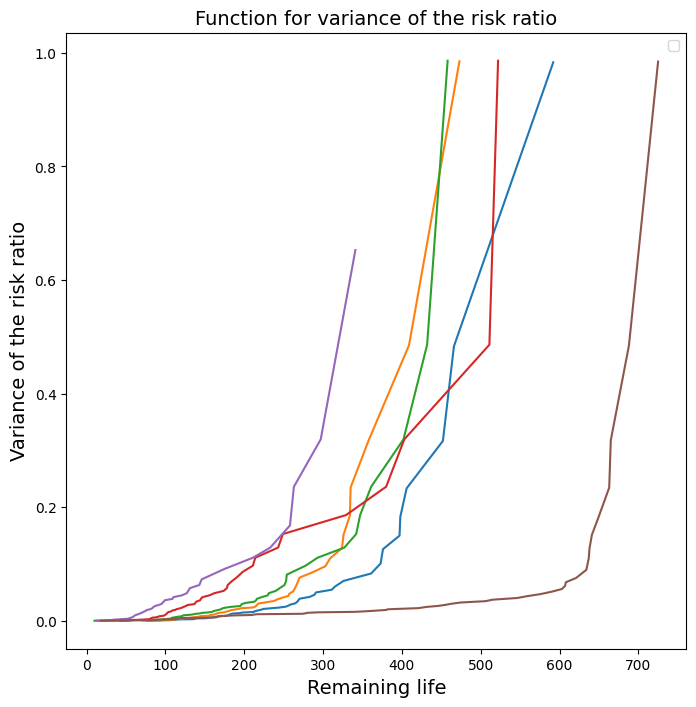

In [30]:
plt.figure(figsize=(8,8))
plt.plot(pig1,vcdf(pig1))
plt.plot(pig2,vcdf(pig2))
plt.plot(pig3,vcdf(pig3))
plt.plot(pig4,vcdf(pig4))
plt.plot(pig5,vcdf(pig5))
plt.plot(pigControl,vcdf(pigControl))
plt.xlabel('Remaining life',size=14)
plt.ylabel('Variance of the risk ratio',size=14)
plt.title('Function for variance of the risk ratio',size=14)
plt.legend()
plt.show()

---

### 8.1.3 秩检验统计量!!!

- #### 顺序统计量与秩
非参数统计使用观测值得顺序作为研究的主要对象之一。对于样本$X_1,X_2,...,X_n$,如果按照升幂排序，得到：
$X_(1),X_(2),...X_(n)$，称之为顺序统计量（order statistic）


- #### U统计量
可以参考：吴喜之，赵博娟编著《非参数统计》（中国统计出版社）

秩检验统计量是一种常见的非参数统计方法的核心，比如著名的Mann-Whitney U检验和Wilcoxon秩和检验。

它们的基本思想是：以数据的秩（rank，即在数据集里的排序位置）作为分析数据的主要手段，而不是像参数检验那样依赖实际的数据值。

秩检验统计量的计算对于不同的测试可能会有些差别，但基本思路相同：首先将所有的数据值混合在一起并按照大小进行排序，然后将排序的位置（从1开始）赋值给每个数据，这个位置就是对应数据值的秩。然后根据特定检验的需求对这些秩进行进一步的计算。

例如，在Mann-Whitney U检验中，秩检验统计量的计算方法是：将两个比较的样本各自的所有秩加总起来，得到两个样本的秩和。然后计算U统计量，该统计量在大致上等于较小的样本秩和减去最小可能的秩和（这等于样本大小乘以（样本大小+1）/2）。得到U值后，可以通过查表或计算p值来得到检验的结果。Mann–Whitney U 检验 (两个不相关的样本)：$$U = n_1n_2 + \frac{n_1(n_1 + 1)}{2} - R_1
$$在这个公式中，n_1 和 n_2 分别是两个样本的大小，而 R_1 是第一个样本中所有秩的和

同样的，对于Wilcoxon秩和检验，也会首先对所有数据值进行排序并赋予秩次，然后用所有“正面”观察值秩次的和（和所有“负面”观察值秩次的和）再进行相关计算。Wilcoxon 符号秩和检验 (两个配对的样本): $$T = \sum_{i=1}^{n}sgn(x_i - y_i) \, rank(|x_i - y_i|)
$$

总体上，秩检验统计量是一种处理不满足正态分布假设或者数据有明显的异常值影响时的一种非常实用的方法。

比如，假设我们在进行一个医学研究，比较新型药物 A 和传统药物 B 对肿瘤大小影响的效果。

    Mann-Whitney U 测试

如果我们分别为两组独立的患者使用药物 A 和 B，观察一段时间后记录每个患者的肿瘤大小，然后我们想要判断药物 A 和 B 是否有显著的差异，这时我们可以使用 Mann-Whitney U 检验。由于两组患者之间无关，属于无配对设计，Mann-Whitney U 检验是更合适的选择。

    Wilcoxon 符号秩和检验

然而，如果我们对同一组患者进行治疗，先使用药物 B，测量治疗结果，然后清洗期过后使用药物 A，再次测量治疗结果，这时，由于我们对同一批患者进行了两次治疗，这就形成了配对设计。这种场景下，Wilcoxon 符号秩和检验更为适合，它能更有效地使用个体差异信息。
总的来说，Mann-Whitney U 检验适用于独立样本或者非配对样本，而 Wilcoxon 符号秩和检验适用于相关样本或配对样本。其他检验条件如数据是否正态分布，异常值数量等对于两者的适用并无影响。

In [31]:
'''
使用scipy的rankdata函数计算秩
例3：计算观测数据[300,230,208,580,690,200,263,215,520]的秩
'''
spending=np.array([300,230,208,580,690,200,263,215,520])
rank=st.rankdata(spending)
rank

array([6., 4., 2., 8., 9., 1., 5., 3., 7.])

- #### 有结数据的秩

就是有一些是相同的数字时的rank，在使用秩检验时，数据中的秩次存在重复情况，也称为"ties"或"有结数据"。

比如 (1+2)/2=1.5


In [8]:
'''
例4：计算观测值：[2,2,4,7,7,7,8,9,9,9,9,10]的秩
'''
data=np.array([2,2,4,7,7,7,8,9,9,9,9,10])
rank=st.rankdata(data)
rank

array([ 1.5,  1.5,  3. ,  5. ,  5. ,  5. ,  7. ,  9.5,  9.5,  9.5,  9.5,
       12. ])

---------

## 8.2 单样本非参数统计推断

## 8.2.1 符号检验

sign test

“符号检验”（Sign test）是一种非参数检验方法，主要用于配对样本的情况，比如重复测量，或者对照试验。它并不关注数据的具体值，而只看数据的符号，也就是说，我们要比较的是一对观察值中，哪个大，哪个小。

下面，我举一个气喘病患者药物治疗的例子来解释：
假设你是一位医生，正在比较两种药物 (药物A和药物B) 对改善20位气喘病患者病症的效果。为每个患者的治疗，你先设计了用药物A转而使用药物B的方案，然后测试并记录每种药物治疗之后患者的喘息频率。

在得到结果后，我们并不关注喘息频率的数值大小，我们只关注药物B治疗后患者的喘息频率是否低于药物A治疗后的频率。也就是说，我们看的是药物B相关频率与药物A相关频率比较的正负符号。

然后，我们统计有多少对患者药物B相关频率少于（或多于）药物A相关频率。这个值我们记为正符号的个数。如果这个数字显著高于10（假设在无差异的情况下，我们期望的中位数是10，因为有20位患者），那么，你就会认为药物B显著优于药物A。
这就是符号检验的基本逻辑。它旨在检查配对观察值中，一个观察值比另一个观察值大的次数是否多于我们期望的次数。

这也是它被称为“符号检验”的原因。

#### 例1：
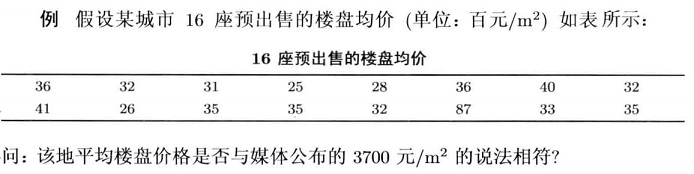

In [32]:
'''
分别使用t检验与二项分布检验
'''
prices=np.array([36,32,31,25,28,36,40,32,41,26,35,35,32,87,33,35])
### 单个样本的t检验,原假设为均值等于给定值
st.ttest_1samp(prices,37)

TtestResult(statistic=-0.141233170716508, pvalue=0.8895650329479428, df=15)

不能拒绝原假设，也就是两者相等~

In [33]:
###通过二项式分布检验 - sign test
length=len(prices)
#均值大于37的比率
success=np.sum(prices>37)
ps=success/length
#检验大于中位数37的房价概率是否等于0.5
p_binom=st.binom_test(success,length,0.5)
###二项分布检验的置信区间使用beta分布进行计算。
lower_success=st.beta.ppf(0.025, success, length - success +1)
upper_success=st.beta.ppf(0.975, success+1, length - success)
print("二项分布检验的p值为：",p_binom,
      '\n\n概率的置信区间为：[%0.8f,%0.8f]'%(lower_success,upper_success))
print('\n房价大于37的实际比率为：',ps)

二项分布检验的p值为： 0.021270751953125 

概率的置信区间为：[0.04047373,0.45645655]

房价大于37的实际比率为： 0.1875


/tmp/ipykernel_3743739/37407316.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_binom=st.binom_test(success,length,0.5)


小于你设定的显著性水平（比如0.05），那么你就可以拒绝零假设，认为大于37的房价所占比例不等于0.5。

下面我们手动实现一下~

In [34]:
import numpy as np
import scipy.stats as st

# prices = np.random.normal(37, 5, 100) # 用随机生成的数据代替实际的房价数据
length = len(prices) # 总的样本数量
successes = np.sum(prices > 37) # 大于37的样本数
prob = 0.5 # 零假设中预期的成功概率
# sf 代表了 Survival Function，也就是生存函数，是指：随机变量取值大于或等于指定值的概率，它等于 1 减去累积分布函数（1-CDF）。
# cdf 代表 Cumulative Distribution Function，也就是累积分布函数，指的是随机变量取值小于或等于指定值的概率。
# 计算 p 值。这里有两种情况需要考虑：大于或等于观测到的成功次数的概率和小于或等于观测到的成功次数的概率。
p_val = 0
if successes > length * prob:
    # 如果观测到的成功次数大于预期的成功次数，计算的是大于或等于观测到的成功次数的概率。
    p_val = st.binom.sf(successes - 1, length, prob)
else:
    # 如果观测到的成功次数小于或等于预期的成功次数，计算的是小于或等于观测到的成功次数的概率。
    p_val = st.binom.cdf(successes, length, prob)

print(f'p value: {p_val:.8f}')


p value: 0.01063538


st.binom_test 实际上会计算出一个更加精确的 p 值，这是因为它不仅仅考虑了大于或小于观测值的概率，同时还考虑了恰好等于观测值的概率。这种方法也被叫做 "双尾" 或 "两端检验"。

而在你的手动计算中，由于使用了累积分布函数 cdf 或生存函数 sf，你其实只计算了单侧的概率，所以可能会与 st.binom_test 的结果有所不同。

如果你想要手动得到与 st.binom_test 相同的结果，你需要同时考虑两侧的概率。这可以通过在对 "大于观测值" 和 "小于观测值" 的概率中取较小值的两倍来实现。

In [35]:
import numpy as np
import scipy.stats as st

# 房价数据，这里默认生成了一组正态分布的随机数据作为示例
# prices = np.random.normal(37, 5, 100)

length = len(prices)  # 总的房价数量
successes = np.sum(prices > 37)  # 大于37的房价数量
prob = 0.5  # 零假设中预期的成功概率

# 二项检验的手动实现
p_greater = st.binom.sf(successes - 1, length, prob)  # 成功次数大于或等于观测次数的概率
p_less = st.binom.cdf(successes, length, prob)  # 成功次数小于或等于观测次数的概率

# 双尾检验的p值是单尾p值的两倍
p_val = 2 * min(p_greater, p_less)

print(f'p value: {p_val:.8f}')


p value: 0.02127075


### 8.2.2 分位数检验


#### 例5：

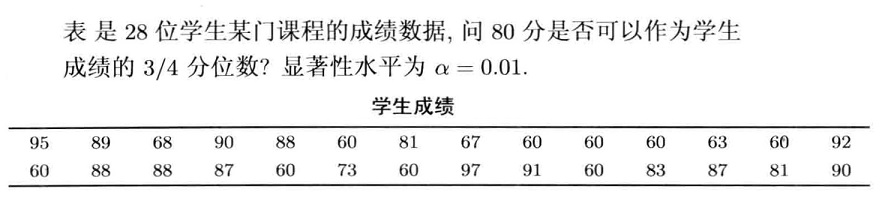

假设检验问题：$H_0:M_{0.75}=80 \Leftrightarrow H_1:M_{0.75}\neq80$

In [36]:
'''
本例属于表中第一类检验问题,属于双侧检验，p值计算的概率应该乘以2
检验结果表明p值小于0.05，拒绝原假设，认为该数据的3/4分位数不是80
'''
scores=np.array([95,89,68,90,88,60,81,67,60,60,60,63,60,92,
                 60,88,88,87,60,73,60,97,91,60,83,87,81,90])
s1=np.sum(scores>80)
s2=np.sum(scores<80)
###p值计算
# 这里这么做的原因是 n=80 时可能会引起报错
2*st.binom.cdf(s2,s1+s2,0.75)

0.002237112950567277

---

### 8.2.3 Cox-Stuart趋势存在性检验

Cox-Stuart 趋势存在性检验主要是用于检验一个有序数据序列（如时间序列数据）是否存在明显的上升或下降趋势。对于医学研究而言，这样的检验在很多场景中都可能非常有用。
例如：

    1. 长期观察研究：如果你正在进行一项长期的观察研究，如观察一种新药物对治疗一种疾病的长期效果，你可以使用 Cox-Stuart 检验来检验患者的健康状况（如血压、血糖或者其它生理指标）是否随着时间的推移呈现出明显的上升或者下降趋势。
    2. 临床质量改进/患者安全项目：在医院或者临床环境中，Cox-Stuart 检验也可以用于检验患者的病情是否改善，例如检验某项干预措施是否有明显的效果。比如你可以用 Cox-Stuart 检验来观察一段时间内医院感染率的变化，看看是否有因为某项措施的实施而明显减少。
    3. 流行病学研究：还可以用于流行病学研究，通过对一段时间内疾病发生率的观察，可以用 Cox-Stuart 检验来验正疾病的发生是否有明显的趋势。

简单来说，Cox-Stuart 检验在医学研究中主要用于评估随时间变化的趋势。然而，这只是一个基本的非参数检验，如果数据符合某些特定的条件或者复杂的研究设计，还可能需要使用更复杂的统计模型来分析。

Cox-Stuart趋势检验的计算过程可以表示为以下步骤：

    对数据进行划分：
    对给定的观测序列 X_1, X_2, ..., X_n，将其划分为前后两部分：



   $$X_1,...,X_{\frac{n}{2}},\  X_{\frac{n}{2} + 1},...,X_n (n为偶数)$$

    比较大小：
比较后一半的数据$(X_{\frac{n}{2} + 1},...,X_n)$是否

大于前一半的数据 $(X_1,...,X_{\frac{n}{2}})$，并根据结果得出符号序列$S_1, S_2, ..., S_{\frac{n}{2}}$：

$$
   S_i = \begin{cases} 
   + & \text{if } X_i < X_{i + \frac{n}{2}} \\
   - & \text{if } X_i ≥ X_{i + \frac{n}{2}}
   \end{cases}
$$
    计算“+”符号的频数：
    计算$S_1, S_2, ..., S_{\frac{n}{2}}$中“+”符号的频数（记为p）。
    进行二项检验：
    对p进行二项分布检验，计算出p值：


   $$p\ value = \text{{binom\_test}}(p, \frac{n}{2}, 0.5)$$

注意：以上计算过程假设序列长度n为偶数的情况，如果序列长度为奇数，可能需要不同的处理方式。请根据实际情况进行修改。

#### 例6:
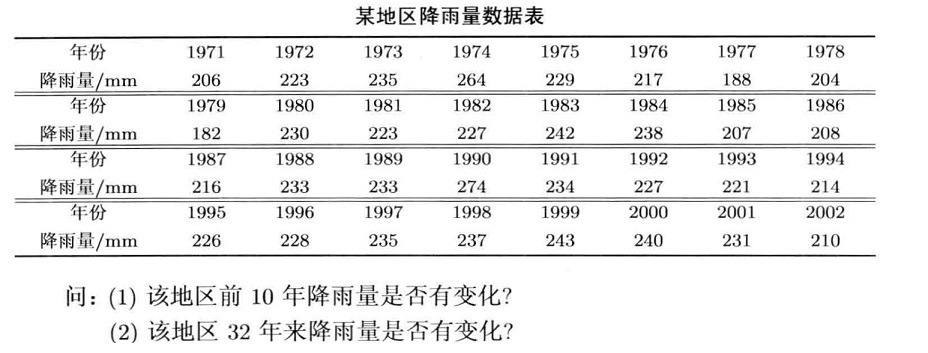


In [37]:
'''
Cox-Stuart趋势检验函数，此检验方法比较常用。
原假设：数据无上升趋势；备择假设：数据有上升趋势。
'''
import numpy as np
import pandas as pd
import scipy.stats as st
def cox_stuart(lst):
    n0=len(lst)
    if n0%2==1:
        n0=n0+1
    #数对间隔，缺省是样本数据长度的一半
    c=int(len(lst)/2)
    #正号和负号的数目，初始化为0
    pos=neg=0
    for i in range(c):
        #数对前后两值之差
        diff=lst[i+c]-lst[i]
        #正号和负号的判定
        if diff>0:
            pos+=1
        elif diff<0:
            neg+=1
        else:##数对相等，不做判定继续进行下一个数对的对比
            continue
    n1=pos+neg ##正负号的总个数
    k=min(pos,neg) ##k值为正负号个数中最小的那个
    
    ###检验p值的计算，双边检验p值需乘以2
    p=2*st.binom.cdf(k,n1,0.5)
    return pos,neg,p

In [38]:
'''
代码运行结果说明：
(1) 该地区头10年降雨量没有明显趋势，因为p值等于1，远大于0.05，不能拒绝无趋势的原假设。
(2) 该地区近32年降雨量有明显上升趋势，p值等于0.00418091，小于0.05，拒绝无趋势的原假设。
'''
rain = [206,223,235,264,229,217,188,204,182,230, 223,227,
        242,238,207,208,216,233,233,274,234,227,221,214,
        226,228,235,237,243, 240,231,210]
###前10年和近32年的降雨量有无上升
rise_10,fall_10,pvalue10=cox_stuart(rain[0:10])
rise_32,fall_32,pvalue32=cox_stuart(rain)
print('前10年的上升次数：%d，下降次数：%d，检验p值分别为：%0.8f'%(rise_10,fall_10,pvalue10))
print('\n近30年的上升次数：%d，下降次数：%d，检验p值分别为：%0.8f'%(rise_32,fall_32,pvalue32))

前10年的上升次数：2，下降次数：3，检验p值分别为：1.00000000

近30年的上升次数：14，下降次数：2，检验p值分别为：0.00418091


In [39]:
import numpy as np
import scipy.stats as st

def cox_stuart_test(data):
    n = len(data)
    m = n // 2
    signs = np.zeros(m)
    
    # Step1: 对半分割，比较后一半的数是否大于前一半的数
    for i in range(m):
        signs[i] = data[i] < data[i+m]
        
    # Step2：统计“+”的数量（即后一半大于前一半的数量）
    num_positives = np.sum(signs)
    
    # Step3：对比数量与期望值，期望值为m/2
    if num_positives > m / 2:
        trend = 'upward'
    elif num_positives < m / 2:
        trend = 'downward'
    else:
        trend = 'no trend'
        
    # Step4: 使用二项检验对结果进行检验
    p_value = st.binom_test(num_positives, m, 0.5, alternative='two-sided')
    
    return trend, p_value

# 生成数据并测试
data = rain
trend, p_value = cox_stuart_test(data)
print(f'Trend: {trend}, P-value: {p_value}')


Trend: upward, P-value: 0.004180908203125


/tmp/ipykernel_3743739/3710672576.py:25: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = st.binom_test(num_positives, m, 0.5, alternative='two-sided')


In [41]:
'''
对降雨量按照年份做回归分析，然后对回归分析的结果进行方差分析。
'''
years=np.arange(1971,2003,1)
# smf 是 Python 中 statsmodels 库的一个子模块，全名为 statsmodels.formula.api。
# 它是 statsmodels 库的公式接口，允许用户使用 R 风格的公式语法进行统计模型的创建。
# ordinary least squares construct linear regression model
results=smf.ols("rain~years",{'years':years,'rain':rain}).fit()
# 执行的是一元方差分析，一元方差分析本质上是检查years对rain的影响是否显著。
# 也就是说，所有不同years的rain是否存在显著差异。这是通过比较模型中的总变差、回归变差和残差变差来实现的。
# 总的来说，这段代码正在实现一元ANOVA分析，可以帮助你了解不同年份的降雨量是否存在显著差异。
sma.anova_lm(results)

,df,sum_sq,mean_sq,F,PR(>F)
years,1.0,535.363728,535.363728,1.579228,0.218569
Residual,30.0,10170.105022,339.003501,NaN,NaN


PR, p值不显著，也就是说结构性方法无法对上述降雨量进行趋势分析，同时下图的曲线图也河南显示显性趋势

体现出来COX-Stuard在非结构数据中趋势性的作用~有点像符号检验

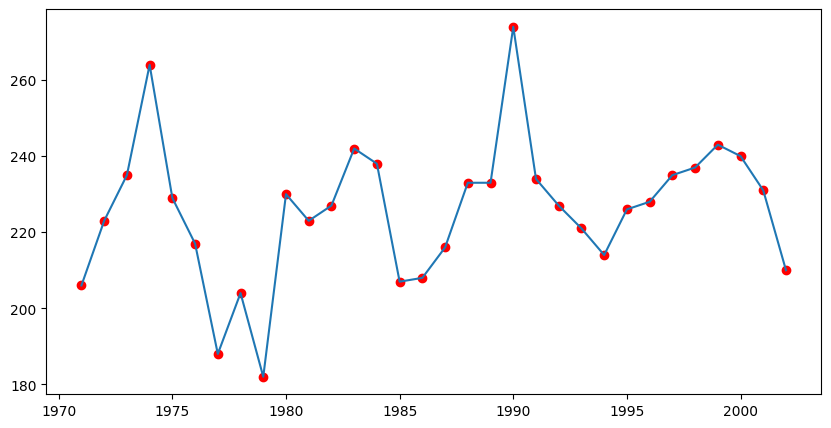

In [42]:
'''
线性趋势曲线
'''
plt.figure(figsize=(10,5))
plt.plot(years,rain)
plt.scatter(years,rain,color='r')
plt.show()

----

### 8.2.4 随机游程检验

随机游程检验是一种统计方法，用于检测一个时间序列是否是随机游程。随机游程是指随着时间的推移，一个变量的值是完全随机、无法预测的，它的下一步变化并不依赖于之前的步骤。随机游程模型在许多经济和金融研究中占据重要地位，因为许多价格序列（如股票价格）常常符合随机游程的特性。
在医学研究中，随机游程检验可以应用在以下几个方面：

    1. 分析连续监测数据：对长期监测的生理参数（如血压、血糖等）进行随机游程检验，可以帮助我们了解这个参数的变化是否随机，还是有一定的趋势可循。
    2. 研究疾病进程：通过对疾病进程的随机游程检验，可以评估疾病的发展是否有一定的趋势，或者随机并难以预测。
    3. 评估干预效果：如果一个治疗方案或干预措施能够使随机游程形式的疾病进程或生理参数的变化出现明显的趋势，可能说明这个干预措施是有效的。

游程检验和ADF（Augmented Dickey-Fuller）检验是两种不同的统计检验，它们都用于研究数据系列的特定属性，但关注的点不同：

1. 游程检验run test：游程检验主要用于检测一个序列（相对于某个标准，例如中位数）的上升和下降是否随机。游程被定义为一连串连续的正值或负值。例如，序列 [1,1,1,0,0,1,1,0,0,0] 有5个游程。游程检验的零假设是序列是随机的。如果我们拒绝零假设，那么就认为序列有某种非随机性的模式存在。

2. ADF检验：ADF检验是一种用于处理时间序列数据的方法，主要用于检测序列是否平稳，或者说检测序列中是否存在单位根。ADF检验的零假设是序列存在单位根，即序列是非平稳的，或说是随机游走的。如果我们拒绝零假设，那么证据就表明序列是平稳的。

这两种检验的一个主要区别在于，游程检验主要关注的是序列的随机性，而ADF检验则更加关注的是时间序列数据的平稳性。在进行这两种检验时，我们需要根据需求和数据类型来选择最为合适的检验方法。

游程检验：
游程检验主要用于检验一个序列的随机性。这可以用于任何类型的二元数据（即只有两种可能结果的数据）。一些可能的应用场景包括：

    判断投掷硬币得到的正面和反面的分布是否随机。
    分析股市涨跌的模式，检验市场是否有效。
    判断一系列判断正确与否（比如预测结果正确与否）的顺序是否是随机的。

ADF检验：
ADF检验（Augmented Dickey-Fuller Test）主要用于处理时间序列数据，用于测试时间序列的平稳性。这对以下场景尤其有用：

    在经济学和金融学中，它常被用来检查价格序列（如股票价格或商品价格）是否是随机游走，这对预测价格变动非常重要。
    研究气候变化的数据，比如观察温度、降雨量等随着时间的变化是否平稳。
    在消费者行为分析中，可以用来检验用户使用次数、购买量等随着时间的变化是否平稳。

总的来说，游程检验更适用于测试序列是否随机，而ADF检验则用于分析时间序列的非平稳性。在实际应用中，我们需要视具体的数据性质和需求来选择合适的检验方式。

步骤1 - 确定正项和负项：对于给定的数据序列 ，我们将每个数据
与目标值进行比较，从而得到一串正数和负数。

步骤2 - 计算游程：
计算序列中连续正值或负值的数量：R

步骤3 - 计算期望值 （E）和方差 （Var）：

    用以下公式计算游程的期望值（E）和方差（Var）：
$$
\begin{equation}
E(R) = 1 + \frac{2n_1n_2}{n_1+n_2}
\end{equation}
$$
$$
\begin{equation}
Var(R) = \frac{2n_1n_2(2n_1n_2 - n_1 - n_2)}{(n_1 + n_2)^2(n_1 + n_2 - 1)}
\end{equation}
$$
其中，
n1是正数数目， n2是负数数目，
R是游程数。

步骤4 - 计算检验统计量 （Z）：

    用以下公式计算检验统计量（Z）：

\begin{equation}
Z = \frac{R - E(R)}{\sqrt{Var(R)}}
\end{equation}

    步骤5 - 确定显著性水平：

根据选择的显著性水平 比较计算出的Z值与标准正态分布，以确定显著性水平。

In [45]:
'''
上例计算 - 游程检验
'''
from statsmodels.sandbox.stats.runs import runstest_1samp
data=[1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0]
n1=10#1的个数
n0=10#0的个数
# 计算z得分，这里的st.norm.ppf(0.025)表示标准正态分布的25%分位数，也就是z=-1.96。
# 计算拒绝域的上限ru和下限rl，这个范围之外的游程数将导致拒绝零假设（序列是随机的）。
z=st.norm.ppf(0.025)/((n1+n0)**0.5)
ru=(2*n1*n0/(n1+n0))*(1+z)#拒绝域上限
rl=(2*n1*n0/(n1+n0))*(1-z)#拒绝域下限
r=8#游程数
print('随机游程检验的拒绝域上限：%0.6f，下限为：%0.6f，游程数为：%d'%(rl,ru,r))
print('\n通过StatsModels的函数检验p值为：',runstest_1samp(data)[1])

随机游程检验的拒绝域上限：14.382613，下限为：5.617387，游程数为：8

通过StatsModels的函数检验p值为： 0.2506917798689591


不能拒绝H0，Random walk~

#### 结果解析

- 随机游程检验的假设：$H_0$: 数据出现顺序随机 $\Leftrightarrow H_1$: 数据出现不随机。

- 根据计算结果：$5.617387 < R=8 < 14.382613$，游程数位于拒绝域的置信区间内，所以不能拒绝原假设。


- 根据StatsModels的runstest_1samp函数检验随机游程，p值大于0.05，因此不能拒绝数据出现顺序随机的原假设。

ADF检验的LaTeX表述：

    给定一个AR(p)模型, 即自回归模型:

\begin{equation}
y_t = \phi*y_{t-1} + e_t + \phi_2 * e_{t-2} + ... + \phi_p * e_{t-p}
\end{equation}
我们假设在此模型中，$\phi =1$
。如果是这种情况，则称该模型具有单位根。

    进行一次差分运算,我们得到:

\begin{equation}
\Delta y_t = (y_t - y_{t-1}) = e_t + \phi_2'\Delta e_{t-2} + ... + \phi_p'\Delta e_{t-p}
\end{equation}
其中,$\Delta$
表示一次差分运算。

现在我们建立以下回归模型进行ADF检验:
\begin{equation}
\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + ... + \delta_{p-1} \Delta y_{t-p+1} + e_t
\end{equation}
在这个模型中，零假设是 ${H_0}: \gamma =0 $，也就是不依赖于前一个时间点，备择假设是 ${H_1}: \gamma < 0 $。

    对模型进行最小二乘法（OLS）估计，并针对参数 

进行t检验。如果t统计量的值小于某个临界值，我们就拒绝原假设，即我们认为该时间序列是平稳的。

In [47]:
import numpy as np
import pandas as pd
from scipy.stats import t

def random_walk_test(series):
    # Calculate the first difference of the series
    delta_series = np.diff(series)

    # Define null hypothesis
    H0 = "Random walk"
    H1 = "Not a random walk"

    # Calculate test statistic
    test_stat = delta_series.mean() / delta_series.std(ddof=1) * np.sqrt(len(delta_series))

    # Assume normal distribution and retrieve critical value
    critical_value = t.ppf(0.05, df=len(delta_series) - 1)

    # Print results
    print(f'Test statistic: {test_stat}')
    print(f'Critical value at 5%: {critical_value}')
    if np.abs(test_stat) > np.abs(critical_value):
        print(f'Result: Reject H0, {H1}')
    else:
        print(f'Result: Cannot reject H0, {H0}')

# Example usage:
# Generate a random walk series
np.random.seed(1)
# rw = np.random.normal(size=100)
rw = data
rw = np.cumsum(rw)

# Perform test
random_walk_test(rw)


Test statistic: 4.024922359499621
Critical value at 5%: -1.734063606617536
Result: Reject H0, Not a random walk


#### 例2：
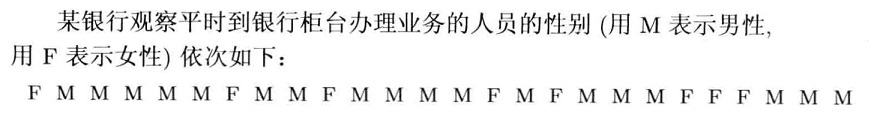

In [48]:
genders=np.array(['F','M','M','M','M','M','F','M','M','F','M',
                  'M','M','M','F','M','F','M','M','M','F','F',
                  'F','M','M','M'])
gens=[]
###将数据转换成int类型的0和1
for i in genders:
    if i=='M':
        gens.append(1)
    else:
        gens.append(0)
n1=18
n0=8
z=st.norm.ppf(0.025)/((n1+n0)**0.5)
rl=(2*n1*n0/(n1+n0))*(1+z)
ru=(2*n1*n0/(n1+n0))*(1-z)
r=12 #游程数
###结果显示游程数位于假设检验的置信区间范围内
#不能拒绝原假设
rl,ru,r,runstest_1samp(gens)[1]

(6.819169163172581, 15.334676990673573, 12, 0.8413055181074309)

In [49]:
'''
构造一个规律性很强，随机性不强的测试数据。
结果显示，该数据出现顺序不随机。
'''
data1=[0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1]
n1=12
n0=9
z=st.norm.ppf(0.025)/((n1+n0)**0.5)
rl=(2*n1*n0/(n1+n0))*(1+z)
ru=(2*n1*n0/(n1+n0))*(1-z)
r=4 #游程数
###结果显示游程数位于假设检验的置信区间范围之外
#游程检验函数的p值小于0.05，拒绝原假设。
rl,ru,r,runstest_1samp(data1)[1]

(5.886522456224299, 14.684906115204274, 4, 0.001901683155591874)

---

### 8.2.5 Wilcoxon符号秩检验

- #### Wilcoxon符号秩检验过程-要求数据符合对称性要求

Wilcoxon符号秩检验 Wilcoxon Signed Rank Test 是一种非参数统计假设检验，用于比较两个配对或匹配的样本以确定它们的总体位置是否有显著差异。它在样本数据不满足正态分布或其他参数检验假设时常用。这种检验的基本思想是对每对观察值的差值进行比较，然后根据差值的绝对值的大小进行秩次排序，符号表示差值的方向




这里要注意一点：你可能会疑惑我们在做基因表达的差异分析的时候，提到过 wilcoxon rank sum test是不一样的~

Wilcoxon秩和检验(Wilcoxon rank-sum test)也称为Mann-Whitney U测试，是用于比较两个独立样本的总体位置是否有显著性差异的一种非参数检验方法。在对总体分布形状没有明确了解或者数据不满足正态分布假设时，Wilcoxon秩和检验是非常有用的。
它的基本步骤如下：

    将两组独立样本合并为一组数据。
    对合并后的数据进行排序，并分配秩次。具有最小值的观测值赋予最小的秩1，具有最大值的观测值赋予最大的秩，依次类推。
    计算每个样本中的观测值的秩和。
    计算检验统计量或p值，以决定是否拒绝原假设。原假设通常是两个样本来自同一总体，或者两个样本的总体位置没有差异。

"秩和"这个词直接翻译过来，"秩"表示数据的排序位置，"和"则表示秩的累积总和。所以“Wilcoxon秩和检验”这个名字，其实就代表了这个检验运算中的主要步骤。


#### 例1：
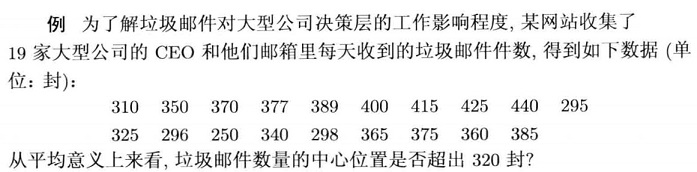

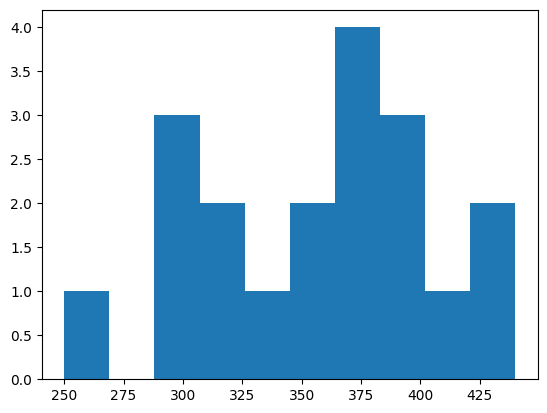

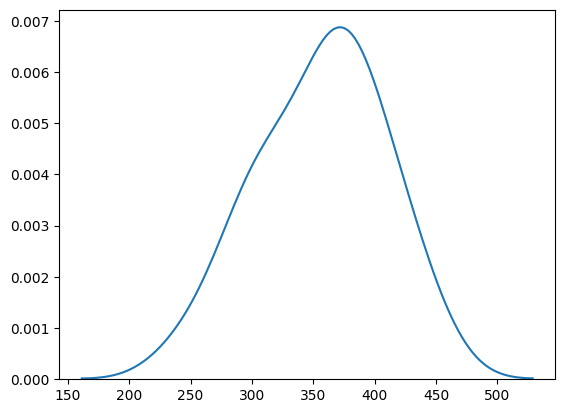

(WilcoxonResult(statistic=158.0, pvalue=0.9958839416503906),
 WilcoxonResult(statistic=32.0, pvalue=0.00945281982421875))

In [50]:
'''
通过直方图和密度曲线可以看出数据大致上对称的。
首先用数据减去320，然后使用符号秩检验。
'''
spammails = np.array([310,350,370,377,389,400,415,425,440,295,
                 325,296,250,340,298,365,375,360,385])
##直方图
plt.hist(spammails)
plt.show()
##密度曲线
sns.kdeplot(spammails)
plt.show()

'''
使用wilcoxon进行符号秩检验。
'''
###双边检验与单边检验
st.wilcoxon(spammails-320,alternative='less'),st.wilcoxon(spammails-320)

In [52]:
import numpy as np
from scipy.stats import rankdata, norm

def wilcoxon_signed_rank_test(x, alternative='less'):
    
    # Step 1: Calculate the differences
    differences = x - 320                     
    
    # Step 2: Remove zero differences
    nonzero_diffs = differences[differences != 0]
    
    # Step 3: Calculate absolute value of the ranks of nonzero differences
    ranks = rankdata(np.abs(nonzero_diffs))
    
    # Step 4: Assign ranks signs corresponding to the sign of the original differences
    signed_ranks = np.where(nonzero_diffs > 0, ranks, -ranks)

    # Step 5: Calculate W+ and W-
    W_plus = sum(signed_ranks[signed_ranks > 0])
    W_minus = np.abs(sum(signed_ranks[signed_ranks < 0]))

    # Step 6: Select minimal W as statistic
    W = min(W_plus, W_minus)

    # calculate z score
    # n很大是需要正态近似？
    n = len(nonzero_diffs)
    z = (W - n*(n+1)/4) / (np.sqrt((n*(n+1)*(2*n+1)/24)))

    # calculate p value based on alternative
    if alternative == 'less':
        p = norm.cdf(z)
    elif alternative == 'greater':
        p = norm.sf(z)
    else:  # alternative is 'two-sided'
        p = 2 * norm.cdf(min(abs(z), 0))
        
    return W, p

# spam_mails = np.array([500, 620, 300, 450, 210, 480, 310])  # replace with actual data
spam_mails = spammails
stat_value, p_value = wilcoxon_signed_rank_test(spam_mails, alternative='less')

print("Statistic:", stat_value, "p-value:", p_value)


Statistic: 32.0 p-value: 0.0056182355128734495


在Wilcoxon符号秩检验中，我们选择W = min(W_plus, W_minus)作为检验统计量的原因是，我们希望检验两个样本是否具有相同的总体分布，特别是两种情况的对称性，也就是正的差值秩和负的差值秩是否大致相同。

选择 W_plus 和 W_minus 中的最小值作为检验统计量 W，可以帮助我们更容易找到对称性的偏离。这是因为在原假设（两个样本具有相同的总体分布）为真的情况下，我们期望W_plus和W_minus都接近于总秩和的一半，所以二者中的最小值应该也会接近这个值，如果有一边显著偏离（比如明显小于这个期望值），那么原假设就可能被拒绝。

因此，选择min(W_plus, W_minus)作为 Wilcoxon 符号秩检验的检验统计量的目的，是为了使得检验结果更具有鲁棒性，能够针对样本中的异常值或偏离对称分布的情况具有更强的敏感度。

-----

### 8.2.6 正态记分检验
 
正态记分检验（Normal Scores Test） 是使用排列方法检验高阶分布矩的一种方法，用于检验数据是否符合正态分布。

正态记分检验又被称为维尔科克森正态性检验（Wilcoxon Normality Test），但它与Wilcoxon符号秩检验是不同的。在正态记分检验中，实际上是对数据的排名进行转换，将原始数据的排名转换为对应的正态分布的值，然后基于这些转换后的值进行正态性检验。

如果样本来自正态分布，那么原始值与转换后的正态记分之间的关系应该是线性的。因此正态记分检验的检验统计量是原始值与其对应的正态记分之间的相关性，如果相关性显著性的值高于预期如0.05（数据可能看起来是线性的而不是正态的），那么我们将原假设（样本来自正态分布）拒之门外。

值得注意的是，与许多其他正态性检验方法一样，正态记分检验的power（能力）随着样本大小的增加而增加，大样本有可能导致原假设被错误地拒绝。所以在使用正态记分检验时，应当注意样本量的选择。

说"拒绝原假设"时，指的是在正态记分检验中，我们通常设定原假设为"样本数据来自正态分布"。如果计算出的相关性远离1，那么我们会拒绝原假设，这意味着我们认为样本数据并非来自正态分布。

在统计学中，拒绝原假设并不意味着一定就接受了备择假设，而是指我们认为有足够的证据支持我们拒绝原假设。因此，即使相关性显著高于预期，但如果这个相关性还是远离1，我们同样会拒绝原假设，即样本数据来自正态分布。
 

#### 例2：
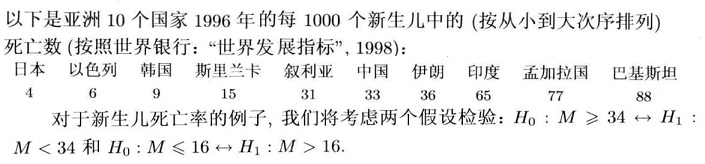



In [54]:
'''
正态记分检验函数
data：被检验数据
m0：比较对象
alternative：备择假设，默认为'greater'，即原假设为‘小于某值’
'''
def normal_score_test(data,m0,alternative='greater'):
    diff=data-m0#差
    diff_abs=np.abs(diff)#差的绝对值
    rank_abs=st.rankdata(diff_abs)#差绝对值的秩
    n=len(data)
    ###求符号秩
    rank_sign=st.norm.ppf((1/2)*(1+rank_abs/(n+1)))*np.sign(diff)
    
    ###W值
    w=np.sum(rank_sign)
    ###正态记分检验统计量
    t_sign=w/np.sum(rank_sign**2)**0.5
    
    ###根据alternative计算p值
    if alternative=='greater':
        pvalue=st.norm.sf(t_sign)
    else:
        pvalue=st.norm.cdf(t_sign)
    return np.round(w,3),np.round(t_sign,3),np.round(pvalue,5)

###第一次调用原假设设为"大于34"；第二个调用原假设为"小于16"
rate=np.array([4,6,9,15,31,33,36,65,77,88])
normal_score_test(rate,34,'less'),normal_score_test(rate,16,'greater')

((1.156, 0.409, 0.65856), (5.218, 1.844, 0.03258))

正态记分检验常用于检验一组数据是否服从正态分布。在这里，"大于"和"小于"的设定其实是和备择假设及其对应的p值计算有关的，而不是直接和正态属性检验有关。

当你进行假设检验时候，你首先会提出一个原假设（在这里通常是样本数据服从正态分布）。然后，你需要设定一个备择假设，这个备择假设通常是与原假设对立的。例如，在你的函数定义中，当你设定备择假设alternative为"greater"时，你其实是要检验数据的均值是否大于m0。同理，当备择假设为"less"时，你检验的就是数据的均值是否小于m0。

然后，你计算出一个统计量（在这里是t_sign），并且根据这个统计量来计算p值。是否拒绝原假设是根据这个p值的大小来决定的。一般来说，如果p值小于某个预定的显著性水平比如0.05，那么我们就有充分的证据拒绝原假设。

实际上，这个检验已经超过了单纯的正态分布检验的范畴，因为你增加了关于数据均值的额外条件（即，是否大于或小于某个值）。如果你只需要检验数据是否服从正态分布，只需要使用正态记分各值相对于理论正态分布的拟合度即可。

对于正态性的检验，你可以使用scipy库提供的正态性检验方法，比如 Shapiro-Wilk 测试和 Anderson-Darling 测试

In [57]:
import numpy as np
import scipy.stats as st

def normality_test_with_normal_scores(data):
    n = len(data)
    # 计算正态记分
    rank = st.rankdata(data)
    normal_scores = st.norm.ppf(rank / (n + 1))
    # 计算W值
    w = np.sum(normal_scores)
    # 计算正态记分检验统计量
    t_stat = w / np.sqrt(np.sum(normal_scores ** 2))

    # 计算p值
    p_value = 2 * st.norm.sf(np.abs(t_stat))

    return w, t_stat, p_value

# 我们用一组随机数据来看一下
# random_data = np.random.normal(0, 1, 1000)
random_data = rate
normality_test_with_normal_scores(random_data)


(-4.440892098500626e-16, -1.7811545944338204e-16, 0.9999999999999999)

In [56]:
import numpy as np
from scipy.stats import shapiro, anderson

# data = np.random.normal(0, 1, 1000)  # 生成一些随机数
data = rate

# Shapiro-Wilk 测试
w, p_value_shapiro = shapiro(data)
print(f"Shapiro-Wilk Test: W={w}, p-value={p_value_shapiro}")

# 如果 p_value_shapiro < 0.05，那么我们拒绝原假设（即，数据服从正态分布）

# Anderson-Darling 测试
result = anderson(data)
print('Anderson-Darling Test:')
print(f'Statistic: {result.statistic}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'At significant level {sl}, critical value: {cv}, data looks normal (fail to reject H0)')
    else:
        print(f'At significant level {sl}, critical value: {cv}, data does not look normal (reject H0)')


Shapiro-Wilk Test: W=0.8898491859436035, p-value=0.16891419887542725
Anderson-Darling Test:
Statistic: 0.4627301719156147
At significant level 15.0, critical value: 0.501, data looks normal (fail to reject H0)
At significant level 10.0, critical value: 0.57, data looks normal (fail to reject H0)
At significant level 5.0, critical value: 0.684, data looks normal (fail to reject H0)
At significant level 2.5, critical value: 0.798, data looks normal (fail to reject H0)
At significant level 1.0, critical value: 0.95, data looks normal (fail to reject H0)


---

### 8.2.7 分布一致性检验

连续型数据一般需判断是否服从正态分布，离散型数据则一般需要判定是否来自二项分布或Possion分布。

分布一致性检验通常用于比较观察到的数据分布是否与理论分布一致，或者比较两组数据是否服从相同的分布。最常用的方法可能是Kolmogorov-Smirnov检验和Chi-square检验。

In [21]:
'''
1:1表示每月的顾客比例为1/6，因此原假设就可以设置为p0=1/6的均匀分布
'''
customers=np.array([27,18,15,24,36,30])
m=150*1/6
chi2_value=np.sum(((customers-m)**2)/m)
chi2_1=st.chi2.ppf(0.95,6-1)
print('检验chi-square:',chi2_value)
print('显著性水平为0.05的chi-square值（自由度：n-1）：', chi2_1)
print('p值：',st.chi2.sf(chi2_value,5),'，小于0.05，拒绝原假设。')

检验chi-square: 12.0
显著性水平为0.05的chi-square值（自由度：n-1）： 11.070497693516351
p值： 0.03478778050624185 ，小于0.05，拒绝原假设。


In [58]:
from scipy.special import factorial
#大于6是1株，5是0株，可以将5估计为1，排除6个虫数及以上的数据
#估计泊松分布的参数lambda
lam=(0*10+1*24+2*10+3*4+4*1+5*1)/50
aphis=np.array([0,1,2,3,4,5])
##现计算前5个数据的泊松分布概率，然后用1减去其总和，得到第6个样本的概率
p=(np.exp(-lam)*lam**aphis[0:5])/factorial(aphis[0:5])
p5=1.0-np.sum(p)
##除了大于6个虫数以外其他所有虫数的概率
p=np.concatenate((p,p5),axis=None)

##将概率分为[0,1,2,>=3]四个档次
p1=np.concatenate((p[0:3],np.sum(p[3:])),axis=None)
##虫数>=3的株数总共是6株
plants=np.array([10,24,10,6])
m=50*p1
chi2_value=np.sum(plants**2/m)-50
chi2_1=st.chi2.ppf(0.95,3-1)
print('检验chi-square:',chi2_value)
print('显著性水平为0.05的chi-square值（自由度：n-1）：', chi2_1)
print('被检验数据的chi-square小于显著性水平为0.05的chi-square值，不能拒绝原假设')
print('p值：',st.chi2.sf(chi2_value,2),'，大于0.05，不能拒绝原假设（即数据符合泊松分布）')

检验chi-square: 3.5778615655276127
显著性水平为0.05的chi-square值（自由度：n-1）： 5.991464547107979
被检验数据的chi-square小于显著性水平为0.05的chi-square值，不能拒绝原假设
p值： 0.16713878182879127 ，大于0.05，不能拒绝原假设（即数据符合泊松分布）


---

### 8.2.8 Komogorov-Smirnov与Liliefor正态性检验

Lilliefors检验，Kolmogorov-Smirnov检验(KS检验)和Shapiro-Wilk检验，都用于检测给定样本是否来自于正态分布的数据。然而，这三者之间存在着一些关键性的区别：

    Kolmogorov-Smirnov(KS)检验：这是一种非参数检验，用于比较两个分布，或者一个样本分布与理论分布之间的差异。它的原理是比较样本和理论分布的累积分布函数（CDF）之间的最大差距。KS检验的一个限制是，对于正态分布来说，它假定我们已知均值和标准差，这在真实情况中通常是未知的。
    
    Lilliefors检验：这是KS检验的一个扩展，适用于检验正态性。Lilliefors检验的关键改进在于考虑了均值和方差的估计不确定性，在经验分布函数和理论分布的比较中引入了更多的宽容。因此，当我们不知道样本分布均值和标准差的真实值时，使用Lilliefors检验比KS检验更准确。
    
    Shapiro-Wilk检验：这是另一种用于正态性检验的方法，它是基于样本均值和方差的函数，而不仅仅是分布的形状。Shapiro-Wilk检验被广泛认为对于小样本（n<50）更加的准确和敏感。

总的来说，KS检验、Lilliefors检验和Shapiro-Wilk检验都可以用于测试样本数据是否符合正态分布，但它们在处理均值和标准差的不确定性、检验的敏感度和适用的样本大小等方面有所不同。在进行正态性检验时，需要考虑这些因素来选择最适合的检验方法。


- #### Komogorov-Smirno正态性检验
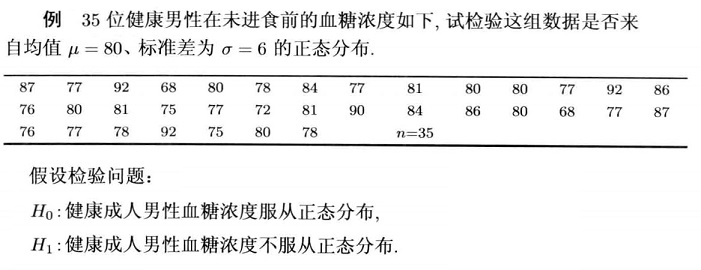

Kolmogorov-Smirnov(KS)检验和Shapiro-Wilk检验都可以用于检车样本数据是否符合正态分布。

KS检验是一种非参数检验方法，本质上是比较两个分布，或者一个样本分布与理论分布的累积分布函数（CDF）之间的差异。在正态性检验中，KS检验会检验观察数据的CDF与正态CDF是否有显著差异。如果p值小于预设的显著性水平（通常为0.05），那么我们就拒绝原假设（样本来自正态分布）。

而Shapiro-Wilk检验则是一种更专门用来测试数据是否符合正态分布的检验方法，它也计算出一个p值，根据p值的大小我们可以判断是否拒绝原假设。

不过，值得注意的是，Shapiro-Wilk检验通常在样本较小的情况下更为准确（例如n<50），而KS检验对样本数量的要求则灵活性较大。

In [59]:
'''
调用scipy的kstest函数对数据进行正态性检验。
可以在args参数里指定正态性检验的均值和标准差。
结果显示，不能拒绝数据服从正态性分布的原假设。
'''
concen=np.array([87,77,92,68,80,78,84,77,81,80,80,77,92,86,
                76,80,81,75,77,72,81,90,84,86,80,68,77,87,
                76,77,78,92,75,80,78])
st.kstest(concen,'norm',args=(80,6))

KstestResult(statistic=0.14810188167481064, pvalue=0.38832688873280896, statistic_location=81, statistic_sign=1)

In [61]:
import numpy as np
from scipy import stats

# 生成一些样本数据
np.random.seed(0)
# x = np.random.normal(size=1000)
x = concen

# 执行KS测试
D, p_value_ks = stats.kstest(x, 'norm',args=(80,6))
print("KS Test:")
print(f"D = {D}")
print(f"p-value = {p_value_ks}")

# 执行Shapiro-Wilk检验
W, p_value_shapiro = stats.shapiro(x)
print("\nShapiro-Wilk Test:")
print(f"W = {W}")
print(f"p-value = {p_value_shapiro}")


KS Test:
D = 0.14810188167481064
p-value = 0.38832688873280896

Shapiro-Wilk Test:
W = 0.9447758197784424
p-value = 0.078313909471035


- #### Liliefor正态性检验

In [24]:
'''
使用Statsmodels的lilliefors函数对数据进行正态性检验。
p值小于0.05，所以拒绝服从正态分布的原假设。
这个和前面的KS检验矛盾。
'''
import statsmodels.stats.api as sst
import statsmodels.stats as sms
import statsmodels.stats.diagnostic as ssd
ssd.lilliefors(concen)

(0.16523133357717523, 0.018805451195889625)

In [25]:
'''
使用scipy的shapiro函数进行检验
p值在显著性水平0.05附近，尽管理论上不能拒绝服从正态性分布的原假设，
但是仍很可疑。
'''
st.shapiro(concen)

ShapiroResult(statistic=0.9447759985923767, pvalue=0.07831479609012604)

In [26]:
'''
使用生成的正态分布的随机数据进行检验，检验结果很显然符合正态分布。
'''
norm1=st.norm.rvs(1,4,100)
ssd.lilliefors(norm1)

(0.09822494429328932, 0.02021803826984824)

---------

## 8.3 两独立样本的位置与尺度判断

当我们有两个独立的样本并且想要比较它们的位置或尺度时（也就是比较它们的中心值或离散程度），我们有多种不同的非参数检验方法可供选择。

    位置检验：如果我们想看的是两个样本的中心位置是否有显著差异，最常用的非参数检验可能是Mann-Whitney U检验（也称为Mann-Whitney-Wilcoxon检验或Wilcoxon秩和检验）。这个检验在Python中可以使用scipy.stats.mannwhitneyu函数实现。
    
    尺度检验：如果我们想比较的是两个样本的尺度或离散程度，有多种方法，例如Levene检验，Bartlett检验。Levene检验可以处理的样本不需要严格满足正态分布，而Bartlett检验对数据的正态性要求更高。在Python中，可以使用scipy.stats.levene和scipy.stats.bartlett函数。
    
- #### 位置与尺度判断函数

（1）中位数位置检验：Brown-Mood中位数检验和Mann-Whitney秩和检验

（2）尺度检验：Mood方法和Moses方法

### 8.3.1 Brown-Mood中位数检验


- #### 例1：
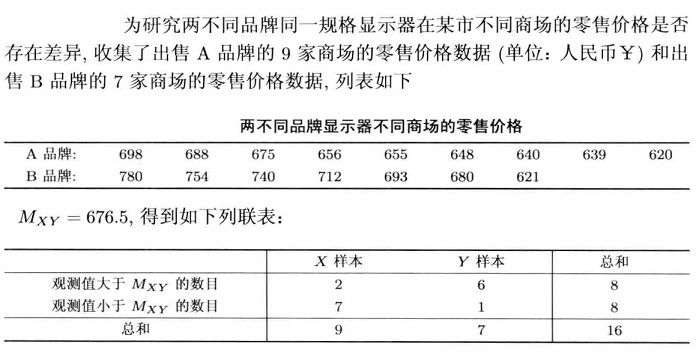

在统计学中，Brown-Mood中位数检验和Mann-Whitney U检验（也被称为Wilcoxon秩和检验）都是非参数检验方法，就是说，它们对于样本数据的原始分布并没有做出大量假设，这使它们在处理一些不能被正态分布很好描述的数据时变得非常有用。然而，它们的主要区别在于用来估计差异的统计量。

Brown-Mood中位数检验，它基于中位数的差异，即集中趋势的差异。这个检验的零假设是两个独立样本来自同一总体（或来自两个总体，但两个总体的中位数相同）。对于每个观察值，我们计算其是否大于总体的中位数，并分别为两个样本计数。然后，使用chi-square检验比较这两个计数值。

Mann-Whitney U检验，它是基于秩次的差异，即位置的差异。这个检验的零假设是，一个随机选择的值从第一个样本更可能大于来自第二个样本的值，反之亦然。对于每对观察值，我们计算哪个值较大，并对结果进行计数。然后，我们将这个计数与期望的计数进行比较，期望的计数是在零假设为真的情况下可能发生的。

因此，这两种方法都适用于非正态数据，且都处理偏态分布和异常值有较强的鲁棒性。但是，Mann-Whitney U检验可以给出更多的信息，除了中位数的差异之外，还有我们关于两个总体分布形状的更多信息。不过，这两种方法都不能提供两个总体方差是否相等的信息，白话就是没有考虑这两个总体的波动情况。

In [27]:
'''
计算2X2列联表中的值
'''
from math import factorial
###手工计算P(A=k)这个公式，
#注意离散型随机变量的分布函数计算和连续型随机变量的计算不同方式。
#当a=2时概率质量函数
mk2=factorial(9)/(factorial(2)*factorial(7))
tk2=factorial(7)/(factorial(6)*factorial(1))
t2=factorial(16)/(factorial(8)*factorial(8))
pmf_2=mk2*tk2/t2
###当a=1时概率质量函数
mk1=factorial(9)/(factorial(1)*factorial(8))
tk1=factorial(7)/(factorial(7)*factorial(0))
t1=factorial(16)/(factorial(8)*factorial(8))
pmf_1=mk1*tk1/t1
###P(A<=a)概率分布函数=等于两个质量函数之和
pvalue=pmf_1+pmf_2
print('p值为：',pvalue,',p值小于0.05，即接受备择假设，Mx<My.')

p值为： 0.020279720279720283 ,p值小于0.05，即接受备择假设，Mx<My.


- ##### 超几何分布的概率密度函数
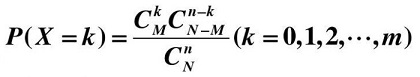

In [28]:
'''
使用超几何分布函数计算p值,仍以H1：Mx<My为例。
'''
x=np.array([698,688,675,656,655,648,640,639,620])
y=np.array([780,754,740,712,693,680,621])
#拼合x和y构成一个完整数组
xy=np.concatenate([x,y],axis=None)
#总样本的中位数
m=np.median(xy)
#总样本中大于中位数的个数
t=np.sum(xy>m)
#样本x的个数
lx=len(x)
#样本y的个数
ly=len(y)
#x和y的总个数
lxy=lx+ly
#样本x中大于中位数的个数
A=np.sum(x>m)

'''
p值计算过程：
总样本为lxy个，其中有t个大于中位数的样本数据，
然后从样本中抽样lx个，这个lx个抽样中有A个或A个以下大于中位数的样本的概率是多少'''
pvalue=st.hypergeom.cdf(A,lxy,t,lx)
###结果和使用手工计算结果一样
pvalue

0.020279720279720272

### 8.3.2 Wilcoxon-Mann-Whitney秩和检验

#### 例：
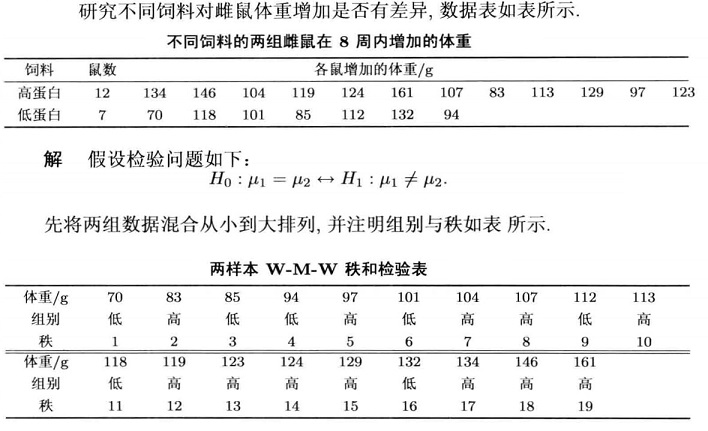


In [29]:
'''
注意在scipy有两个函数进行Wilcoxon-Mann-Whitney秩和检验。
'''
h=np.array([134,146,104,119,124,161,107,83,113,129,97,123])
l=np.array([70,118,101,85,112,132,94])
st.mannwhitneyu(h,l,alternative='two-sided')


MannwhitneyuResult(statistic=62.0, pvalue=0.10026196713503215)

Mann-Whitney U 统计量计算步骤：

    计算所有观察值的秩。
    计算每个样本中的秩和。
    使用这个公式计算 Mann-Whitney U 统计量:
    U1= n1n2 + (n1(n1+1))/2 - R1
    U2= n1n2 + (n2(n2+1))/2 - R2

n1 和 n2 是两个样本的大小，R1 和 R2 是两个样本的秩和。
可使用 scipy 中的 norm.ppf() 函数来计算该值对应的 p 值。但这种方法的前提是样本数量足够大（一般而言，每个样本至少有30个观察值）并且样本取自连续的分布。如果样本较小，或者来自离散分布，那么可能需要使用更精确的方法来计算 p 值。
这是一个手动实现 Mann-Whitney U 检验的例子：

In [63]:
import numpy as np
from scipy import stats

# 定义样本
h = np.array([134,146,104,119,124,161,107,83,113,129,97,123])
l = np.array([70,118,101,85,112,132,94])

# 计算所有观测值的秩
ranks = stats.rankdata(np.concatenate([h, l]))

# 计算各个样本秩和
R1 = np.sum(ranks[:len(h)])
R2 = np.sum(ranks[len(h):])

# 计算 Mann-Whitney U 统计量
n1 = len(h)
n2 = len(l)
U1 = n1*n2 + (n1*(n1+1))/2 - R1
U2 = n1*n2 + (n2*(n2+1))/2 - R2

# U 值为 U1 和 U2 中较小的那个
U = min(U1, U2)

# 计算对应的 z 值
mu = n1*n2/2
sigma = np.sqrt(n1*n2*(n1+n2+1)/12)
z = (U - mu) / sigma

# 计算 p 值
p_value = 2 * stats.norm.sf(abs(z))  # 双尾检验

print('U:', U)
print('p-value:', p_value)



U: 22.0
p-value: 0.09096894797535775


对于较不大，无法正常逼近的样本，或者在计算p值时数据集中存在许多相同（并列）的秩次，我们需要用到精确方法，而非正态逼近方法。然而，象征性地呈现这种精确分布的计算方法在实践中会非常复杂，因为要考虑到所有可能的观测值排列方式。

在Python中，scipy.stats.mannwhitneyu函数最准确的处理这种情况的方式就是将method参数设置为exact（默认值是'auto'，会根据样本的大小自动选择计算方法）。这样，会采用精确的分布法进行计算，并且在计算秩次时也会考虑到并列的情况。

In [64]:
import numpy as np
from scipy.stats import mannwhitneyu

# 定义样本
h = np.array([134,146,104,119,124,161,107,83,113,129,97,123])
l = np.array([70,118,101,85,112,132,94])

# 执行 Mann-Whitney U 检验，使用精确方法计算p值
u, p_value = mannwhitneyu(h, l, method='exact')

print('U:', u)
print('p-value:', p_value)


U: 62.0
p-value: 0.10026196713503215


### 8.3.3 尺度检验：Mood方差检验
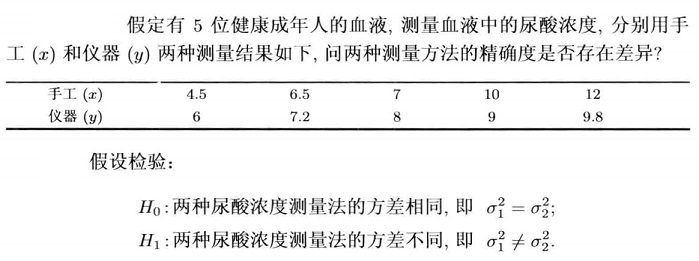

执行了三个不同的统计检验：Mood's Test、Fligner-Killeen Test和Ansari-Bradley Test。

    Mood's Test 是一种非参数检验，用于检查两个或更多组是否具有相同的分布。它考察的是分布的尺度（即分布的广度或波动程度）而不是位置。
    
    Fligner-Killeen Test，是非参数检验，用于检验两个或多个样本是否具有相同的方差。
    
    Ansari-Bradley Test，也是非参数检验，用于检验两个独立样本是否具有相同的方差。

这些测试返回的结果包括统计量和对应的 p 值。p 值表示如果原假设（样本具有相同的尺度或分布）为真，观察到当前或更极端结果的概率。如果 p 值小于某个显著性水平（如 0.05），我们通常会拒绝原假设。

In [30]:
'''
对于尺度的检验
'''
meas1=np.array([4.5,6.5,7,10,12])
meas2=np.array([6,7.2,8,9,9.8])
st.mood(meas1,meas2),st.fligner(meas1,meas2),st.ansari(meas1,meas2)

((1.651445647689541, 0.09864761042929915),
 FlignerResult(statistic=1.181491035755236, pvalue=0.2770526592529645),
 AnsariResult(statistic=11.0, pvalue=0.14285714285714285))

--------